In [1]:
import numpy as np
import re
from sklearn.model_selection import train_test_split
# ^^^ pyforest auto-imports - don't write above this line
import os, shutil
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications import VGG16

Using TensorFlow backend.


In [16]:
original_dataset_dir = 'datasets/catndogs/'
base_dir = 'datasets/catndogs_small'
os.mkdir(base_dir)

In [4]:
!pip freeze ?


absl-py==0.8.1
arrow==0.15.4
astor==0.8.0
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
Augmentor==0.2.8
backcall==0.1.0
binaryornot==0.4.4
bleach==1.5.0
blis==0.4.1
boto==2.49.0
boto3==1.9.234
botocore==1.12.234
cachetools==3.1.1
certifi==2019.9.11
cffi==1.13.2
chardet==3.0.4
Click==7.0
colorama==0.4.1
cookiecutter==1.6.0
cryptography==2.8
cycler==0.10.0
cymem==2.0.2
Cython==0.29.15
decorator==4.4.0
deepcorrect==1.0.5
defusedxml==0.6.0
docopt==0.6.2
docutils==0.15.2
dominate==2.4.0
en-core-web-sm==2.2.5
entrypoints==0.3
Flask==1.1.1
Flask-Bootstrap==3.3.7.1
funcy==1.13
future==0.18.2
gast==0.2.2
gensim==3.8.0
gingerit==0.8.0
gitdb==0.6.4
GitPython==1.0.1
gluoncv==0.6.0
gluonnlp==0.9.0.post0
google-auth==1.7.1
google-auth-oauthlib==0.4.1
google-cloud==0.34.0
google-pasta==0.1.8
googletrans==2.4.0
grammarbot==0.2.0
graphviz==0.8.4
grpcio==1.25.0
guessing-game==0.0.0
h5py==2.10.0
hnswlib==0.3.4
html5lib==0.9999999
idna==2.6
idx2numpy==1.2.2
imageio==2.6.1
imgaug==0.4.0
importlib-met

In [17]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [18]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [19]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [20]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
Total test cat images:  500
Total test dog images:  500


In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [29]:
#Data Preprocessing

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [58]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small.h5')

Epoch 1/30
 27/100 [=======>......................] - ETA: 29s - loss: 0.7024 - acc: 0.4870

KeyboardInterrupt: 

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

NameError: name 'history' is not defined

In [26]:
plt.plot(epochsochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

NameError: name 'epochsochs' is not defined

In [27]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

NameError: name 'epochs' is not defined

In [34]:
#Overfitting can be seen in the model,now we use data augmentation from keras to increase the validation accuracy

In [35]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [36]:
fnames =[os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [37]:
img_path = fnames[3]

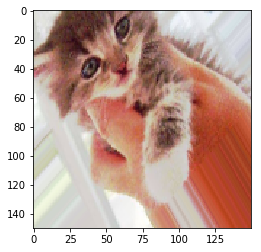

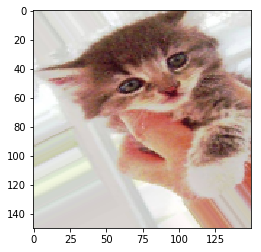

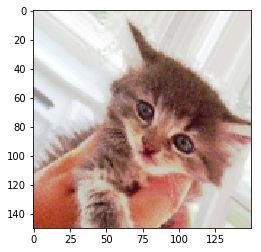

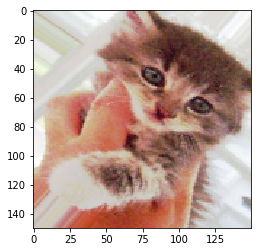

In [38]:
img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i= 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+= 1
    if i % 4 ==0:
        break
plt.show()

In [39]:
#Training a neural network with dropout and image augmentation

In [40]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [41]:
train_datagen = ImageDataGenerator(
                            rescale= 1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)
model.save('cats_and_dogs_small_2(aug and dropout).h5')

Epoch 1/100
  6/100 [>.............................] - ETA: 1:08 - loss: 0.7556 - acc: 0.5104

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochsochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [43]:
#we achieved the accuracy of almost 87% with this optimisation, now to further increase the accuracy we need to put in more data, for that we are using pretrained convnet

In [44]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [46]:
#Feature extraction without data augmentation

In [47]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [48]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4 ,4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory,
                target_size=(150, 150),
                batch_size=batch_size,
                class_mode='binary')
    i=0
    
    for input_batch , label_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i* batch_size : (i + 1)* batch_size] = features_batch
        labels[i*batch_size : (i + 1)* batch_size] = label_batch
        i +=1
        if i* batch_size >= sample_count:
            break
    return features, labels

In [49]:
train_features, train_lablels = extract_features(train_dir, 2000)
validation_features, validation_lablels = extract_features(validation_dir, 1000)
test_features, test_lablels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [50]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [53]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4 *4* 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer= optimizers.RMSprop(lr = 2e-5), loss='binary_crossentropy', metrics = ['acc'])

In [82]:
history = model.fit(train_features, train_lablels, epochs = 30, batch_size = 20, validation_data = (validation_features, validation_lablels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5880 - acc: 0.6750 - val_loss: 0.4301 - val_acc: 0.8490
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4246 - acc: 0.8030 - val_loss: 0.3566 - val_acc: 0.8570
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3450 - acc: 0.8590 - val_loss: 0.3129 - val_acc: 0.8910
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3055 - acc: 0.8765 - val_loss: 0.2901 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2807 - acc: 0.8830 - val_loss: 0.2764 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2611 - acc: 0.8915 - val_loss: 0.2667 - val_acc: 0.9010
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2485 - acc: 0.9005 - val_loss: 0.2604 - val_acc: 0.9000
Epoch 8/30
200

In [83]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

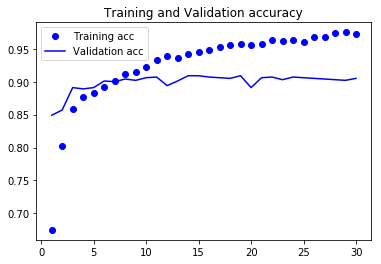

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

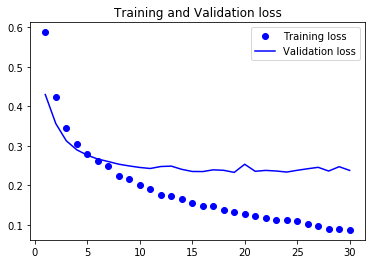

In [86]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
#Feature Extraction using Data Augmentation

In [55]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [56]:
conv_base.trainable = False

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
train_datagen = ImageDataGenerator(
                            rescale= 1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
model.compile(optimizer= optimizers.RMSprop(lr = 2e-5), loss='binary_crossentropy', metrics = ['acc'])

In [14]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)
model.save('cats_and_dogs_small_2_VGG16_with_Aug.h5')

NameError: name 'train_generator' is not defined

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
#Freezing all layers upto a specific one layer.

In [61]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [62]:
model.compile(optimizer= optimizers.RMSprop(lr = 1e-5), loss='binary_crossentropy', metrics = ['acc'])

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [64]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)
model.save('cats_and_dogs_small_2_VGG16_with_Aug_with_unfreeze_some_layers.h5')

Epoch 1/100
  5/100 [>.............................] - ETA: 4:24 - loss: 2.7684 - acc: 0.4750

KeyboardInterrupt: 

In [65]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [69]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test Acc :', str(test_acc))

KeyboardInterrupt: 